[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/ADA440_Python_4_DS/blob/main/ALE/ALE3.ipynb)

## In this assignment you will do a bit explanatory data analysis.

In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes(as_frame = True)
dataset["data"]["blood_sugar"] = dataset["target"]
dataset_ = dataset["data"]

In [3]:
## This dataset is normalized!!! So that there are negative numbers in the age column.
dataset_

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,blood_sugar
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Answer the following questions
## Please keep your answers in clear and concise.

In [ ]:
## Sketch histogram of blood_sugar distribution. Is it right skewed or left skewed?
## Which feature is most corrolated with blood_sugar? (sketch a X, y graph)
## In general which feature is least important to blood sugar? (sketch X, y graph)
## What happens as people age? Blood sugar increases or decreases?
## Do you expect high blood sugar value in men or woman? Sketch a graph.

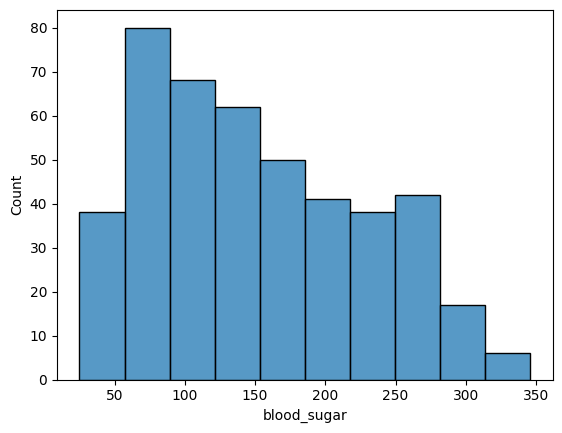

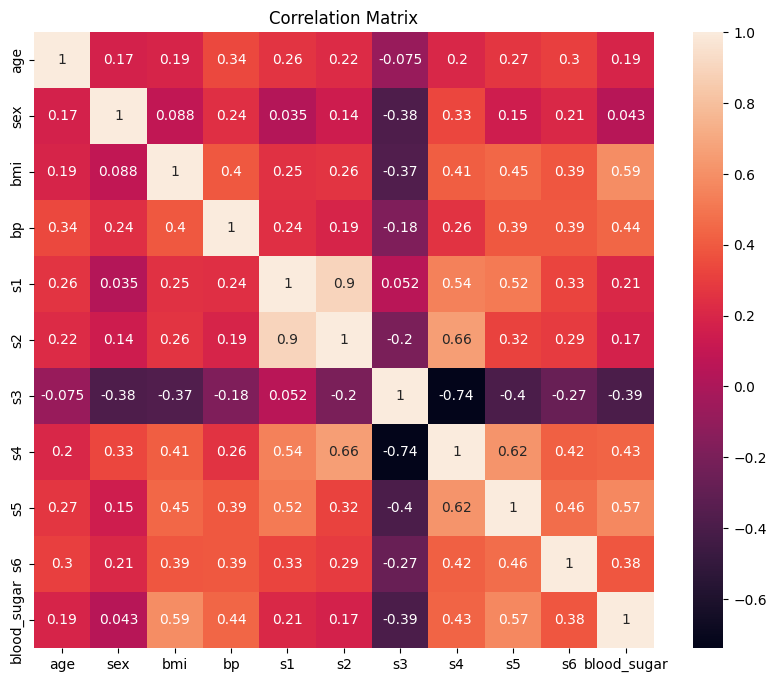

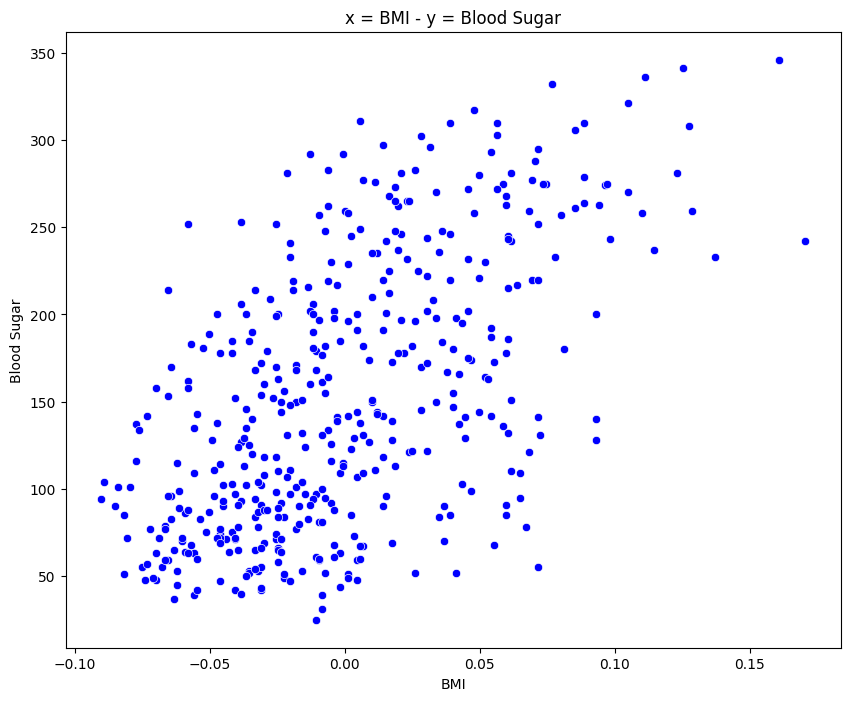

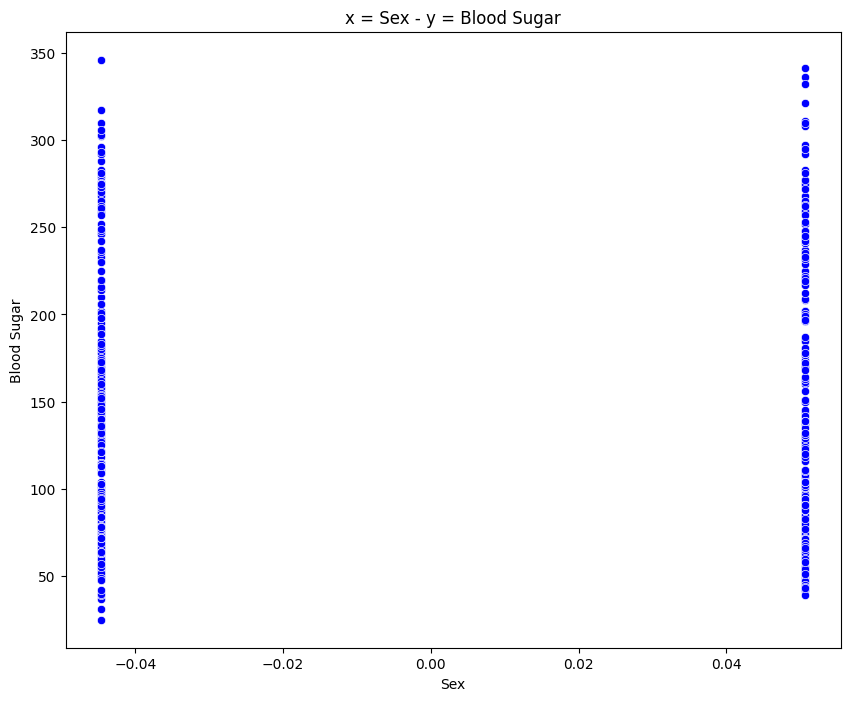

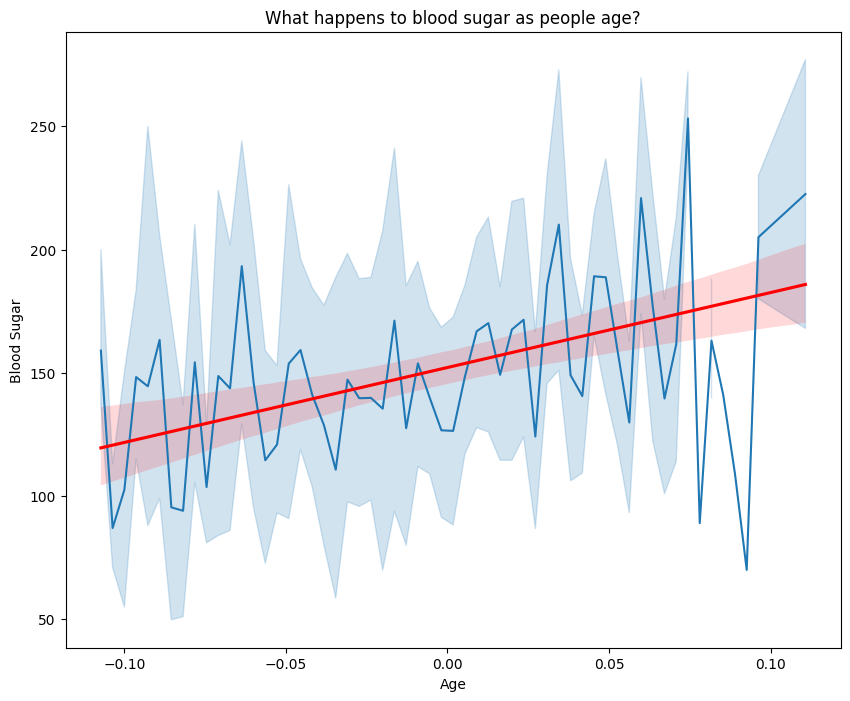

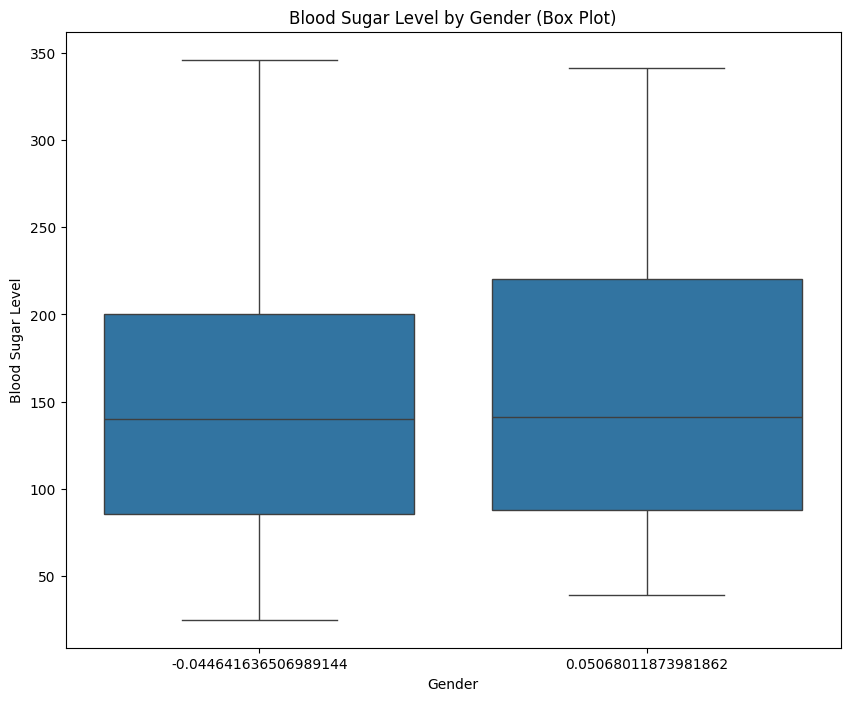

In [5]:
# 1) We can see from the histogram (first plot), it is right skewed
sns.histplot(x = dataset["data"]["blood_sugar"])


# 2) We can see from the correlation matrix that 'bmi' is the most correlated feature with 'blood_sugar'
# Because it is the closest value to 1 (The closes value to -1 (negative correlation) is s3)
correlation_matrix = dataset_.corr()
plot.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plot.title("Correlation Matrix")
plot.show()
# Here is the plot of Blood Sugar - BMI
plot.figure(figsize=(10, 8))
sns.scatterplot(data=dataset_, x='bmi', y='blood_sugar', color='blue')
plot.title('x = BMI - y = Blood Sugar')
plot.xlabel('BMI')
plot.ylabel('Blood Sugar')
plot.show()


# 3) We can see from the correlation matrix that 'sex' is the least correlated feature with 'blood_sugar'
# Because it is the closest value to 0 which means no correlation
plot.figure(figsize=(10, 8))
sns.scatterplot(data=dataset_, x='sex', y='blood_sugar', color='blue')
plot.title('x = Sex - y = Blood Sugar')
plot.xlabel('Sex')
plot.ylabel('Blood Sugar')
plot.show()


# 4) We can see from the plot and the sns.regplot that blood sugar increases as people age
# Even though there are some decreases in late ages, we can say that there is an increase in general
# In detailed analyses, my method of commenting on linreg line may not be effective or correct because there is not any certain increase or decrease by looking
plot.figure(figsize=(10, 8))
sns.lineplot(x='age', y='blood_sugar', data=dataset_)
sns.regplot(x='age', y='blood_sugar', data=dataset_, scatter=False, color='red')
plot.title('What happens to blood sugar as people age?')
plot.xlabel('Age')
plot.ylabel('Blood Sugar')
plot.show()


# 5) I plotted the box plot for the genders and blood sugar and saw that the medians are almost the same
# But the upper quartile (Q3) of 0.05 valued sex is higher than the -0.04 valued sex's upper quartile. Therefore, it is likely that there
# are higher blood sugar levels in 0.05 valued sex
# I checked the dataset's website (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) but there are no instructions about which
# value is female and which value is male so I mentioned them as '0.05 valued sex' and '-0.04 valued sex'
plot.figure(figsize=(10, 8))
sns.boxplot(x='sex', y='blood_sugar', data=dataset_)
plot.title('Blood Sugar Level by Gender (Box Plot)')
plot.xlabel('Gender')
plot.ylabel('Blood Sugar Level')
plot.show()